In [1]:
import xarray as xr
from eofs.xarray import Eof
import numpy as np

In [2]:
ds = xr.open_dataset("/Volumes/YagizHDD/Meteorological-Applications/Data_Analysis_ML/Project_2/project2_bigdata.nc")

In [3]:
ds_EL_NINO = ds.sel(lon=slice(120,260),lat=slice(-20,60))
ds_EL_NINO=ds_EL_NINO.chunk({'time': 1})

In [4]:
el_nino_djf= ds_EL_NINO.where(ds_EL_NINO['time.season'] == 'DJF').groupby('time.year').mean('time')
el_nino_djf["tas"]= el_nino_djf["tas"] - 273.15
ds_EL_NINO_an = el_nino_djf-el_nino_djf.mean(dim='year')
ds_EL_NINO_an2 = ds_EL_NINO_an - ds_EL_NINO_an.mean(dim='year')
ds_EL_NINO_an=ds_EL_NINO_an2.rename({"year":"time"})

In [5]:
tas_EL_NINO = ds_EL_NINO_an.tas

In [6]:
#EOF analysis of EL NINO
import numpy as np

coslat = np.cos(np.deg2rad(tas_EL_NINO.coords['lat'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(-tas_EL_NINO, weights=wgts)
# retrieve the first two EOFs from the solver class
eof_EL_NINO = solver.eofsAsCorrelation(neofs=2)
pc_EL_NINO=solver.pcs(npcs=2, pcscaling=1)

In [ ]:
# Save for after use in CNN
eof_EL_NINO.to_netcdf("/Volumes/YagizHDD/Meteorological-Applications/Data_Analysis_ML/Project_2/eof_EL_NINO.nc")
pc_EL_NINO.to_netcdf("/Volumes/YagizHDD/Meteorological-Applications/Data_Analysis_ML/Project_2/pc_EL_NINO.nc")

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/constructive.py:180: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yagizcanurkmez/anaconda3/envs/data_analys

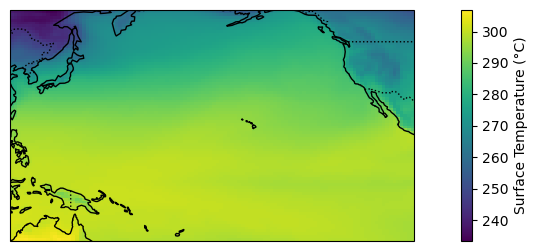

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(12, 3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

plt.pcolormesh(ds_EL_NINO.lon,ds_EL_NINO.tas.lat,ds_EL_NINO.tas[0,:,:],cmap='viridis',transform=ccrs.PlateCarree())
plt.colorbar(label='Surface Temperature (°C)')

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
plt.show()

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import numpy as np

bounds_t = np.arange(-1, 1.2, 0.2) 
colors_t = ["indigo","purple",'darkblue', 'blue', 'deepskyblue', 'lightcyan', 'oldlace', 'gold',"orange", 'red',"darkred","black"]
cmap_t = plt.cm.RdBu_r
# Normalizasyon
norm_t= BoundaryNorm(bounds_t, cmap_t.N)

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return 

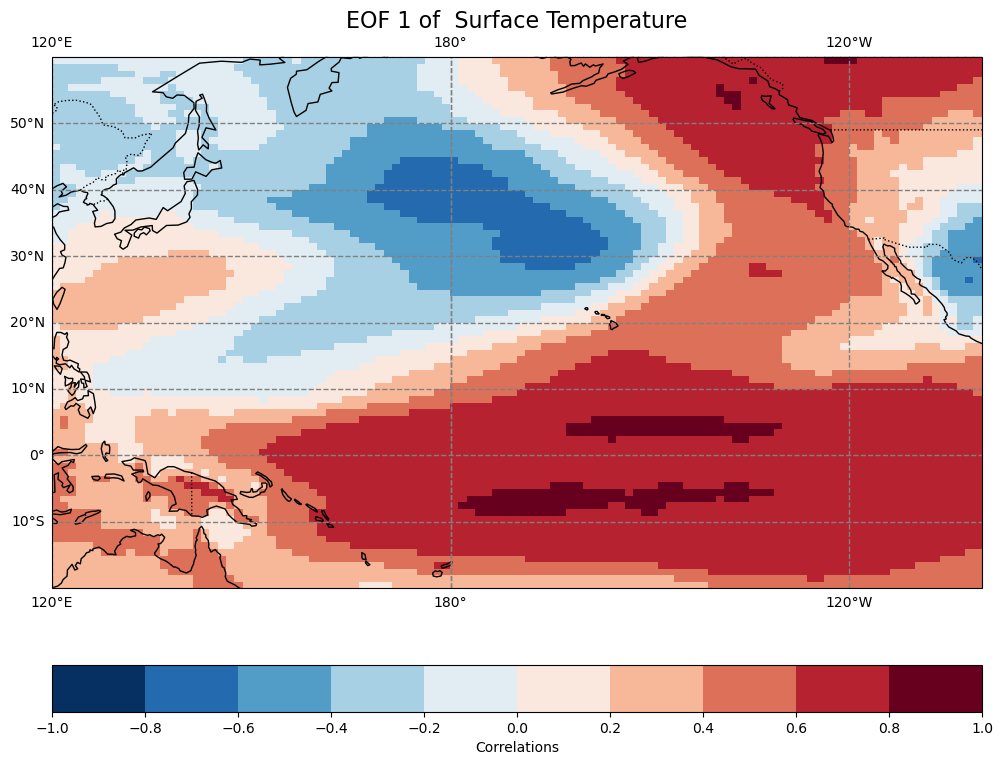

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return 

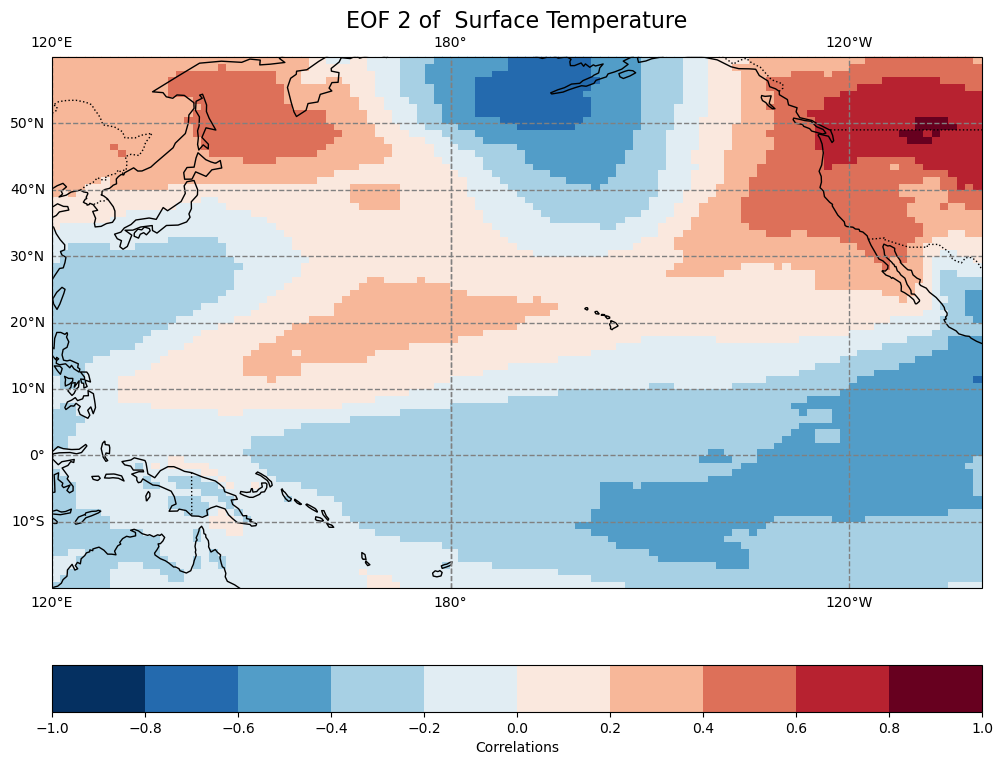

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return 

In [ ]:
import cartopy.feature as cfeature
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

for i in range(0,2):
    fig = plt.figure(figsize=(12, 10))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

    plt.pcolor(eof_EL_NINO.lon,eof_EL_NINO.lat,eof_EL_NINO[i,:,:],transform=ccrs.PlateCarree(),cmap=cmap_t,norm=norm_t)
    plt.colorbar(label='Correlations',orientation='horizontal', pad=0.1,boundaries=bounds_t,ticks=bounds_t)

    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.gridlines(color='gray',draw_labels=True,linewidth=1, alpha=1, linestyle='--')
    ax.set_title(f'EOF {i+1} of  Surface Temperature', fontsize=16)
    plt.show()
    fig.savefig(f'/Volumes/YagizHDD/Meteorological-Applications/Data_Analysis_ML/Project_2/EOF{i+1}_ENSO.png', dpi=300, bbox_inches='tight')

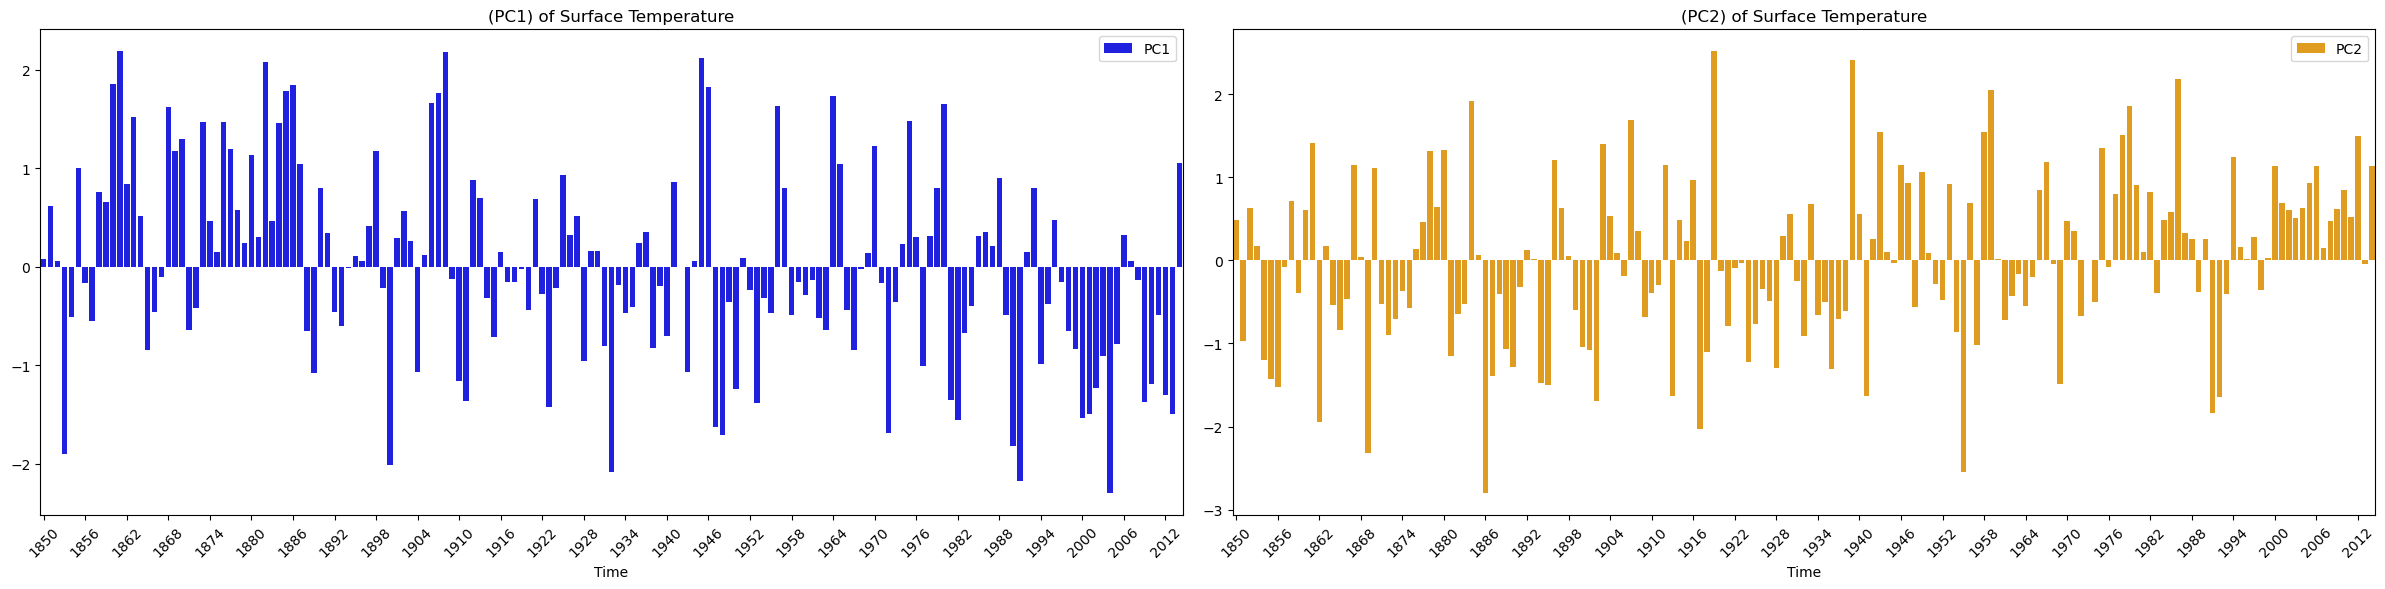

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(24, 6))

# Barplots
sns.barplot(x=pc_EL_NINO.time.values, y=pc_EL_NINO.sel(mode=0).values, label='PC1', color='blue', ax=ax[0])
sns.barplot(x=pc_EL_NINO.time.values, y=pc_EL_NINO.sel(mode=1).values, label='PC2', color='orange', ax=ax[1])

# Set x-axis labels and rotate ticks for readability
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].title.set_text('(PC1) of Surface Temperature')
ax[1].title.set_text('(PC2) of Surface Temperature')
for a in ax:
    for label in a.get_xticklabels():
        label.set_rotation(45)
    a.set_xticks(ax[0].get_xticks()[::max(1, len(ax[0].get_xticks())//25)])  # Reduce number of ticks if too many

plt.tight_layout()
plt.show()
fig.savefig('/Volumes/YagizHDD/Meteorological-Applications/Data_Analysis_ML/Project_2/PCs_ENSO.png', dpi=300, bbox_inches='tight')

In [8]:
ds_NAO = ds.sel(lon=slice(300,360),lat=slice(30,90))
ds_NAO=ds_NAO.chunk({'time': 1})

In [ ]:
ds_NAO = ds_NAO.where(ds_NAO['time.month'].isin([11,12,1,2,3,4])).groupby('time.year').mean('time')
ds_NAO_an = ds_NAO - ds_NAO.mean(dim='year')
ds_NAO_an = ds_NAO_an.rename({"year":"time"})
psl_NAO=ds_NAO_an.psl

In [13]:
#EOF analysis of NAO
import numpy as np

coslat = np.cos(np.deg2rad(psl_NAO.coords['lat'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(psl_NAO, weights=wgts)
# retrieve the first two EOFs from the solver class
eof_NAO = solver.eofsAsCorrelation(neofs=2)
pc_NAO=solver.pcs(npcs=2, pcscaling=1)

In [ ]:
# Save after use CNN
eof_NAO.to_netcdf("/Volumes/YagizHDD/Meteorological-Applications/Data_Analysis_ML/Project_2/eof_NAO.nc")
pc_NAO.to_netcdf("/Volumes/YagizHDD/Meteorological-Applications/Data_Analysis_ML/Project_2/pc_NAO.nc")

In [17]:
from matplotlib.colors import BoundaryNorm, ListedColormap
import numpy as np

bounds_p = np.arange(-1, 1.2, 0.2) 
colors_p = ["darkcyan","steelblue",'deepskyblue', 'mediumaquamarine', 'mediumspringgreen', 'mintcream', 'lavenderblush', 'pink',"palevioletred", 'orchid',"darkmagenta","indigo"]
cmap_p = plt.cm.PuOr_r
# Normalizasyon
norm_p= BoundaryNorm(bounds_p, cmap_p.N)

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


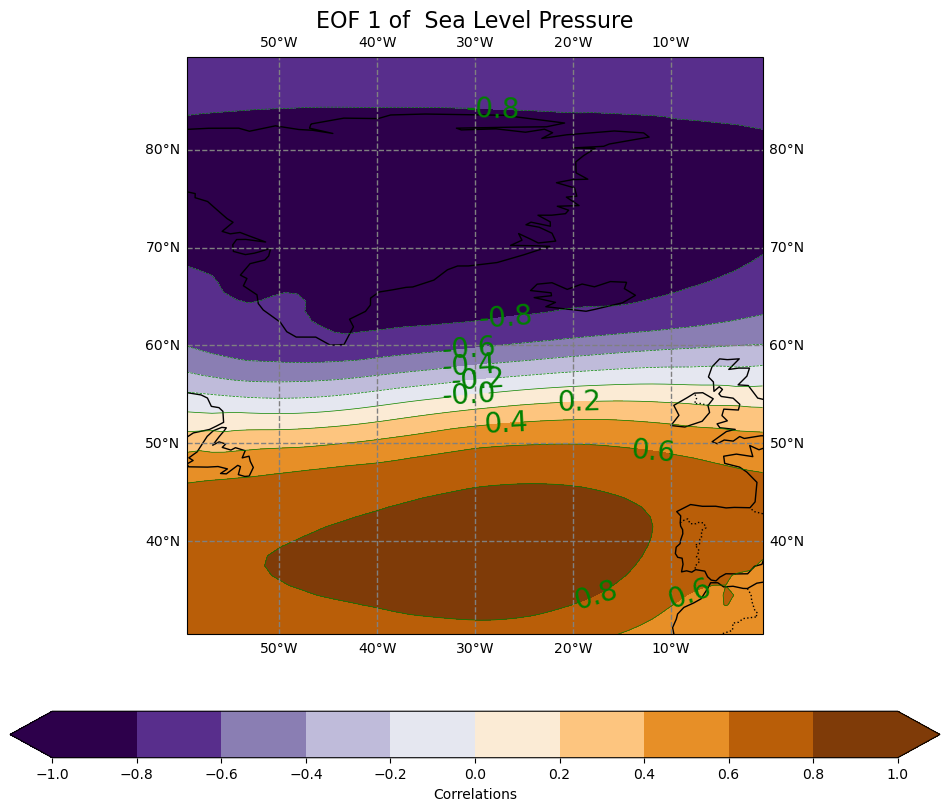

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


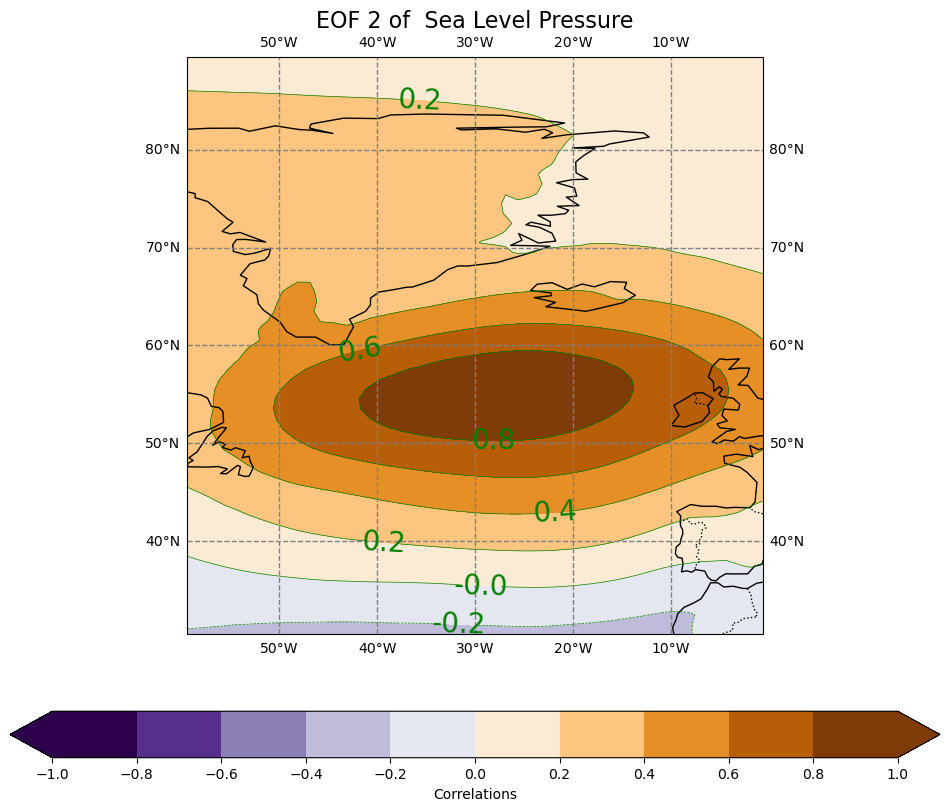

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


In [200]:
for i in range(0, 2):
    fig = plt.figure(figsize=(12, 10))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

    cf = plt.contourf(
        eof_NAO.lon, eof_NAO.lat, eof_NAO[i, :, :],
        levels=bounds_p, cmap=cmap_p, norm=norm_p, extend='both',
        transform=ccrs.PlateCarree()
    )
    a = plt.contour(
        eof_NAO.lon, eof_NAO.lat, eof_NAO[i, :, :],
        levels=bounds_p, colors='green', linewidths=0.5,
        transform=ccrs.PlateCarree()
    )
    cbar = plt.colorbar(
        cf, ax=ax, label='Correlations',
        orientation='horizontal', pad=0.1, boundaries=bounds_p, ticks=bounds_p
    )
    ax.clabel(a, inline=True, fontsize=20, fmt='%1.1f')
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.gridlines(color='gray', draw_labels=True, linewidth=1, alpha=1, linestyle='--')
    ax.set_title(f'EOF {i+1} of  Sea Level Pressure', fontsize=16)
    plt.show()
    fig.savefig(f'/Volumes/YagizHDD/Meteorological-Applications/Data_Analysis_ML/Project_2/EOF{i+1}_NAO.png', dpi=300, bbox_inches='tight')

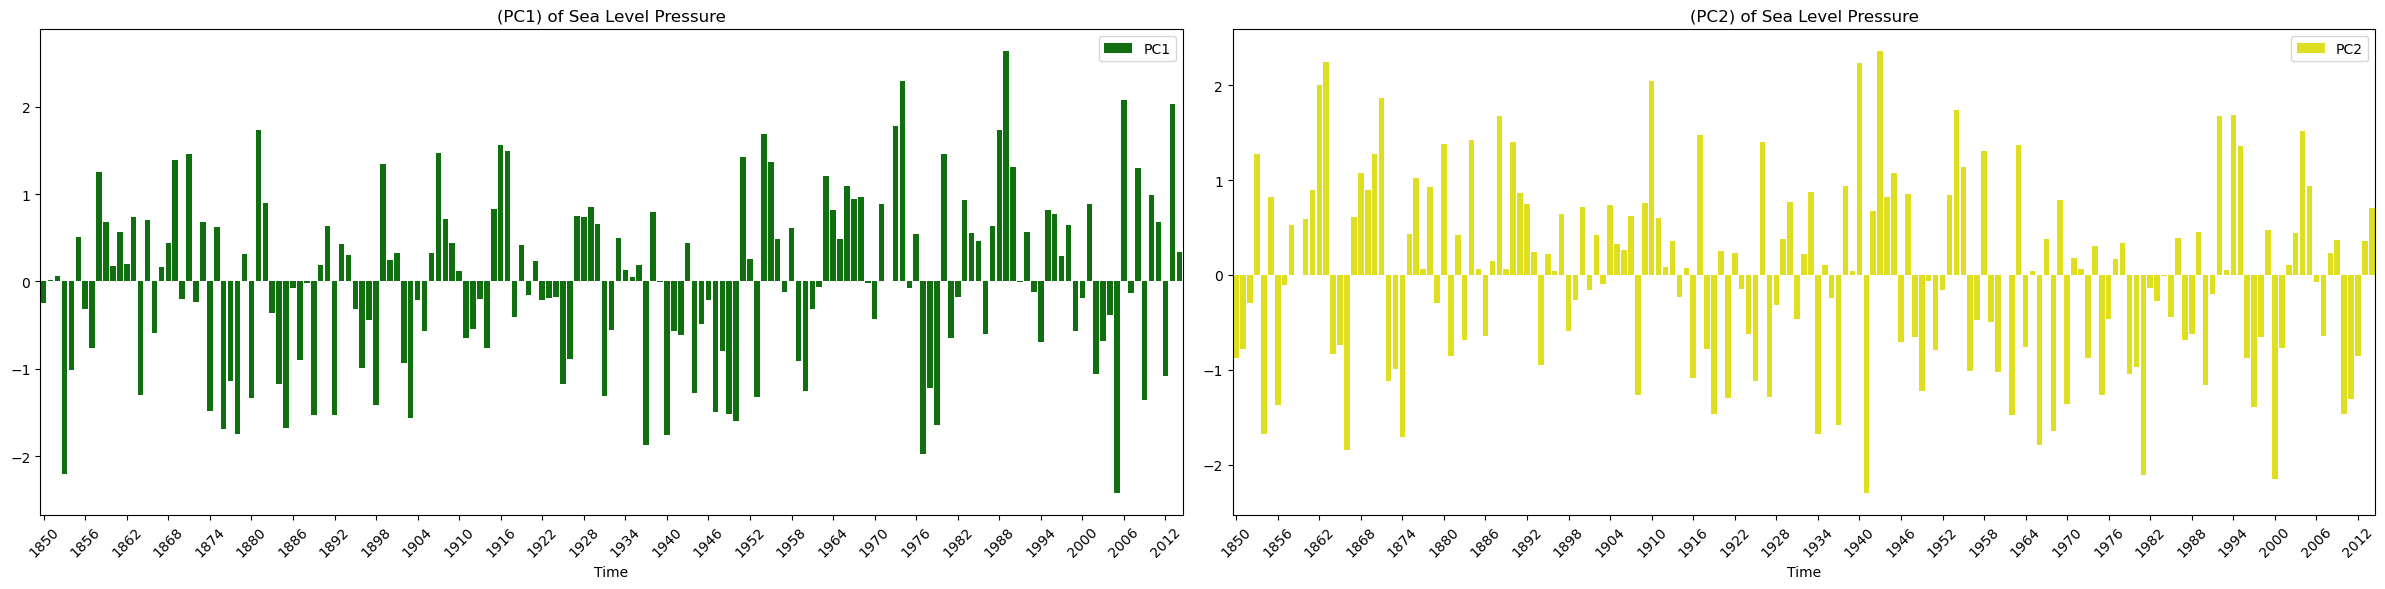

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(24, 6))

# Barplots
sns.barplot(x=pc_NAO.time.values, y=pc_NAO.sel(mode=0).values, label='PC1', color='green', ax=ax[0])
sns.barplot(x=pc_NAO.time.values, y=pc_NAO.sel(mode=1).values, label='PC2', color='yellow', ax=ax[1])

# Set x-axis labels and rotate ticks for readability
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].title.set_text('(PC1) of Sea Level Pressure')
ax[1].title.set_text('(PC2) of Sea Level Pressure')
for a in ax:
    for label in a.get_xticklabels():
        label.set_rotation(45)
    a.set_xticks(ax[0].get_xticks()[::max(1, len(ax[0].get_xticks())//25)])  # Reduce number of ticks if too many

plt.tight_layout()
plt.show()
fig.savefig('/Volumes/YagizHDD/Meteorological-Applications/Data_Analysis_ML/Project_2/PCs_NAO.png', dpi=300, bbox_inches='tight')

In [20]:
#CORRELATIONS

In [16]:
def wanted_lat_lon(df,lat,lon,var_lat,var_lon):
    lat_values=df[var_lat].values
    lon_values=df[var_lon].values
    res_lat = lat_values[1]-lat_values[0]
    res_lon = lon_values[1]-lon_values[0]
    lat_num=(abs(min(lat_values)-lat).round()*abs(1/(res_lat)).round()) # wanted latitude for spesific point
    lon_num=(abs(min(lon_values)-lon)*abs(1/(res_lon))).round() # wanted longitude for spesific point
    print(f"Latitude number is: {int(lat_num)}") 
    print(f"Longitude number is: {int(lon_num)}")
    return int(lat_num), int(lon_num)

In [17]:

lat_num_N, lon_num_W = wanted_lat_lon(ds, 70,0,"lat","lon") # WEST AREA
lat_num_S, lon_num_E = wanted_lat_lon(ds, 35,55,"lat","lon") # EAST AREA

Latitude number is: 160
Longitude number is: 1
Latitude number is: 124
Longitude number is: 44


In [18]:
lat_num_N_w, lon_num_W_w = wanted_lat_lon(ds, 70,350,"lat","lon") # WEST AREA
lat_num_S_w, lon_num_E_w = wanted_lat_lon(ds, 35, 360,"lat","lon") # EAST AREA

Latitude number is: 160
Longitude number is: 280
Latitude number is: 124
Longitude number is: 288


In [ ]:
# Selecting areas for using in Correlations Europe and USA

euw_pr=ds["pr"][:,lat_num_S_w:lat_num_N_w,lon_num_W_w:lon_num_E_w]
euw_sfcW= ds["sfcWind"][:,lat_num_S_w:lat_num_N_w,lon_num_W_w:lon_num_E_w]
euw_ua= ds["ua"][:,8,lat_num_S_w:lat_num_N_w,lon_num_W_w:lon_num_E_w]
euw_va= ds["va"][:,8,lat_num_S_w:lat_num_N_w,lon_num_W_w:lon_num_E_w]
eue_pr=ds["pr"][:,lat_num_S:lat_num_N,lon_num_W:lon_num_E]
eue_sfcW= ds["sfcWind"][:,lat_num_S:lat_num_N,lon_num_W:lon_num_E]
eue_ua= ds["ua"][:,lat_num_S:lat_num_N,lon_num_W:lon_num_E]
eue_ua= ds["ua"][:,8,lat_num_S:lat_num_N,lon_num_W:lon_num_E]
eue_va= ds["va"][:,8,lat_num_S:lat_num_N,lon_num_W:lon_num_E]
usa_pr=ds["pr"].sel(lat=slice(21,60),lon=slice(230,300))
usa_sfcW= ds["sfcWind"].sel(lat=slice(21,60),lon=slice(230,300))
usa_ua= ds["ua"].sel(lat=slice(21,60),lon=slice(230,300))[:,8,:,:]
usa_va= ds["va"].sel(lat=slice(21,60),lon=slice(230,300))[:,8,:,:]
 



In [ ]:
#Regenarete lon values to -180 to +180 scale
euw_pr["lon"] = np.arange(-10,0,euw_pr.lon[1]-euw_pr.lon[0])
euw_sfcW["lon"]= np.arange(-10,0,euw_sfcW.lon[1]-euw_sfcW.lon[0])
euw_ua["lon"]= np.arange(-10,0,euw_ua.lon[1]-euw_ua.lon[0])
euw_va["lon"]= np.arange(-10,0,euw_va.lon[1]-euw_va.lon[0])

In [ ]:
# TOTAL EUROPE
eu_pr = xr.concat([euw_pr, eue_pr], dim="lon")
eu_sfcWind=xr.concat([euw_sfcW,eue_sfcW],dim="lon")
eu_ua=xr.concat([euw_ua,eue_ua],dim="lon")
eu_va=xr.concat([euw_va,eue_va],dim="lon")



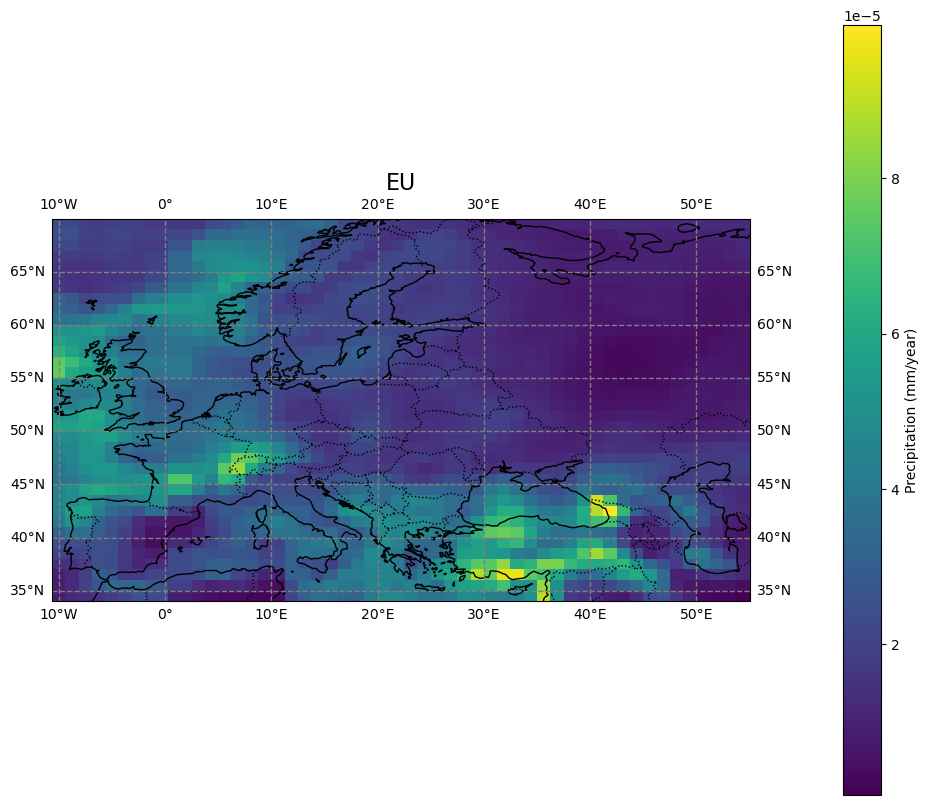

In [205]:
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

plt.pcolormesh(eu_pr.lon,eu_pr.lat,eu_pr[0,:,:],transform=ccrs.PlateCarree(),cmap="viridis")
plt.colorbar(label='Precipitation (mm/year)',orientation='vertical', pad=0.1)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(color='gray',draw_labels=True,linewidth=1, alpha=1, linestyle='--')
ax.set_title(f'EU', fontsize=16)
plt.show()

/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/yagizcanurkmez/anaconda3/envs/data_analysis/lib/python3.13/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


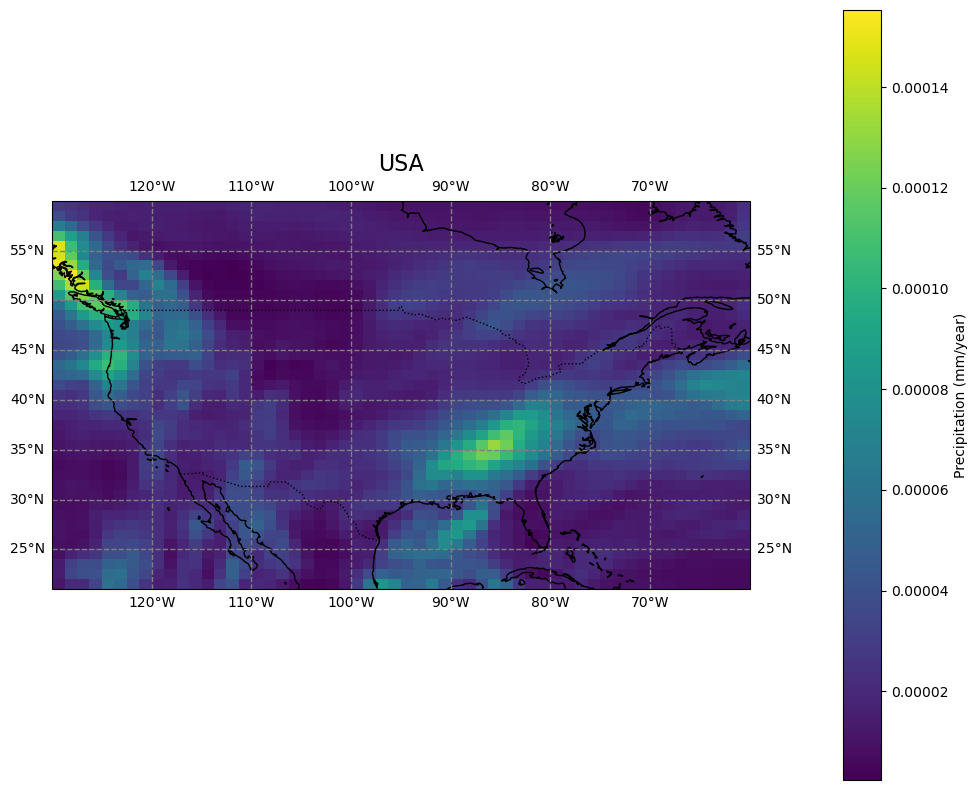

In [27]:
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

plt.pcolormesh(usa_pr.lon,usa_pr.lat,usa_pr[0,:,:],transform=ccrs.PlateCarree(),cmap="viridis")
plt.colorbar(label='Precipitation (mm/year)',orientation='vertical', pad=0.1)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(color='gray',draw_labels=True,linewidth=1, alpha=1, linestyle='--')
ax.set_title(f'USA', fontsize=16)
plt.show()

In [ ]:
# Sub Domains for Precipitation
eu_MED_pr = eu_pr.sel(lat=slice(35,45)) 
eu_WCE_pr = eu_pr.sel(lat=slice(45,55))
eu_NEU_pr = eu_pr.sel(lat=slice(55,70))
usa_NCA_pr = usa_pr.sel(lat=slice(20,35),lon=slice(230,270))
usa_ENA_pr = usa_pr.sel(lat=slice(20,50),lon=slice(270,290))
usa_WNA_pr = usa_pr.sel(lat=slice(35,50),lon=slice(230,255))
usa_CNA_pr = usa_pr.sel(lat=slice(35,50),lon=slice(255,270))

In [ ]:
# Sub Domains for Surface Wind
eu_MED_sfcW = eu_sfcWind.sel(lat=slice(35,45)) 
eu_WCE_sfcW = eu_sfcWind.sel(lat=slice(45,55))
eu_NEU_sfcW = eu_sfcWind.sel(lat=slice(55,70))
usa_NCA_sfcW= usa_sfcW.sel(lat=slice(20,35),lon=slice(230,270))
usa_ENA_sfcW = usa_sfcW.sel(lat=slice(20,50),lon=slice(270,290))
usa_WNA_sfcW = usa_sfcW.sel(lat=slice(35,50),lon=slice(230,255))
usa_CNA_sfcW = usa_sfcW.sel(lat=slice(35,50),lon=slice(255,270))

In [ ]:
# Sub Domains for 250mb Wind u component
eu_MED_ua = eu_ua.sel(lat=slice(35,45)) 
eu_WCE_ua = eu_ua.sel(lat=slice(45,55))
eu_NEU_ua = eu_ua.sel(lat=slice(55,70))
usa_NCA_ua = usa_ua.sel(lat=slice(20,35),lon=slice(230,270))
usa_ENA_ua = usa_ua.sel(lat=slice(20,50),lon=slice(270,290))
usa_WNA_ua = usa_ua.sel(lat=slice(35,50),lon=slice(230,255))
usa_CNA_ua = usa_ua.sel(lat=slice(35,50),lon=slice(255,270))

In [ ]:
# Sub Domains for 250mb Wind v component
eu_MED_va = eu_va.sel(lat=slice(35,45)) 
eu_WCE_va = eu_va.sel(lat=slice(45,55))
eu_NEU_va = eu_va.sel(lat=slice(55,70))
usa_NCA_va = usa_va.sel(lat=slice(20,35),lon=slice(230,270))
usa_ENA_va = usa_va.sel(lat=slice(20,50),lon=slice(270,290))
usa_WNA_va = usa_va.sel(lat=slice(35,50),lon=slice(230,255))
usa_CNA_va = usa_va.sel(lat=slice(35,50),lon=slice(255,270))

In [ ]:
# where(eu_NEU_pr['time.month'].isin([11,12,1,2,3,4]))
# where(eu_WCE_pr['time.month'].isin([11,12,1,2,3,4]))
# where(eu_MED_pr['time.month'].isin([11,12,1,2,3,4]))

In [ ]:
# Taking yearly means for precipitation 
eu_NEU_pr_mean=eu_NEU_pr.groupby('time.year').sum(dim=["time"])
eu_WCE_pr_mean=eu_WCE_pr.groupby('time.year').sum(dim=["time"])
eu_MED_pr_mean=eu_MED_pr.groupby('time.year').sum(dim=["time"])
usa_NCA_pr_mean=usa_NCA_pr.groupby('time.year').sum(dim=["time"])
usa_ENA_pr_mean=usa_ENA_pr.groupby('time.year').sum(dim=["time"])
usa_WNA_pr_mean=usa_WNA_pr.groupby('time.year').sum(dim=["time"])
usa_CNA_pr_mean=usa_CNA_pr.groupby('time.year').sum(dim=["time"])


In [ ]:
# Taking yearly means for surface wind
eu_NEU_sfcW_mean=eu_NEU_sfcW.groupby('time.year').mean(dim=["time"])
eu_WCE_sfcW_mean=eu_WCE_sfcW.groupby('time.year').mean(dim=["time"])
eu_MED_sfcW_mean=eu_MED_sfcW.groupby('time.year').mean(dim=["time"])
usa_NCA_sfcW_mean=usa_NCA_sfcW.groupby('time.year').mean(dim=["time"])
usa_ENA_sfcW_mean=usa_ENA_sfcW.groupby('time.year').mean(dim=["time"])
usa_WNA_sfcW_mean=usa_WNA_sfcW.groupby('time.year').mean(dim=["time"])
usa_CNA_sfcW_mean=usa_CNA_sfcW.groupby('time.year').mean(dim=["time"])

In [ ]:
# Taking yearly means for 250 mb wind u component
eu_NEU_ua_mean=eu_NEU_ua.groupby('time.year').mean(dim=["time"])
eu_WCE_ua_mean=eu_WCE_ua.groupby('time.year').mean(dim=["time"])
eu_MED_ua_mean=eu_MED_ua.groupby('time.year').mean(dim=["time"])
usa_NCA_ua_mean=usa_NCA_ua.groupby('time.year').mean(dim=["time"])
usa_ENA_ua_mean=usa_ENA_ua.groupby('time.year').mean(dim=["time"])
usa_WNA_ua_mean=usa_WNA_ua.groupby('time.year').mean(dim=["time"])
usa_CNA_ua_mean=usa_CNA_ua.groupby('time.year').mean(dim=["time"])

In [ ]:
# Taking yearly means for 250 mb wind v component
eu_NEU_va_mean=eu_NEU_va.groupby('time.year').mean(dim=["time"])
eu_WCE_va_mean=eu_WCE_va.groupby('time.year').mean(dim=["time"])
eu_MED_va_mean=eu_MED_va.groupby('time.year').mean(dim=["time"])
usa_NCA_va_mean=usa_NCA_va.groupby('time.year').mean(dim=["time"])
usa_ENA_va_mean=usa_ENA_va.groupby('time.year').mean(dim=["time"])
usa_WNA_va_mean=usa_WNA_va.groupby('time.year').mean(dim=["time"])
usa_CNA_va_mean=usa_CNA_va.groupby('time.year').mean(dim=["time"])

In [ ]:
#Rename for eof has to be "time" not "year"
eu_NEU_pr_mean=eu_NEU_pr_mean.rename({"year":"time"})
eu_WCE_pr_mean=eu_WCE_pr_mean.rename({"year":"time"})
eu_MED_pr_mean=eu_MED_pr_mean.rename({"year":"time"})
usa_NCA_pr_mean=usa_NCA_pr_mean.rename({"year":"time"})
usa_ENA_pr_mean=usa_ENA_pr_mean.rename({"year":"time"})
usa_WNA_pr_mean=usa_WNA_pr_mean.rename({"year":"time"})
usa_CNA_pr_mean=usa_CNA_pr_mean.rename({"year":"time"})

eu_NEU_sfcW_mean=eu_NEU_sfcW_mean.rename({"year":"time"})
eu_WCE_sfcW_mean=eu_WCE_sfcW_mean.rename({"year":"time"})
eu_MED_sfcW_mean=eu_MED_sfcW_mean.rename({"year":"time"})
usa_NCA_sfcW_mean=usa_NCA_sfcW_mean.rename({"year":"time"})
usa_ENA_sfcW_mean=usa_ENA_sfcW_mean.rename({"year":"time"})
usa_WNA_sfcW_mean=usa_WNA_sfcW_mean.rename({"year":"time"})
usa_CNA_sfcW_mean=usa_CNA_sfcW_mean.rename({"year":"time"})

eu_NEU_ua_mean=eu_NEU_ua_mean.rename({"year":"time"})
eu_WCE_ua_mean=eu_WCE_ua_mean.rename({"year":"time"})
eu_MED_ua_mean=eu_MED_ua_mean.rename({"year":"time"})
usa_NCA_ua_mean=usa_NCA_ua_mean.rename({"year":"time"})
usa_ENA_ua_mean=usa_ENA_ua_mean.rename({"year":"time"})
usa_WNA_ua_mean=usa_WNA_ua_mean.rename({"year":"time"})
usa_CNA_ua_mean=usa_CNA_ua_mean.rename({"year":"time"})
eu_NEU_va_mean=eu_NEU_va_mean.rename({"year":"time"})

eu_WCE_va_mean=eu_WCE_va_mean.rename({"year":"time"})
eu_MED_va_mean=eu_MED_va_mean.rename({"year":"time"})
usa_NCA_va_mean=usa_NCA_va_mean.rename({"year":"time"})
usa_ENA_va_mean=usa_ENA_va_mean.rename({"year":"time"})
usa_WNA_va_mean=usa_WNA_va_mean.rename({"year":"time"})
usa_CNA_va_mean=usa_CNA_va_mean.rename({"year":"time"})

In [ ]:
# Spatial mean for sub-domains
eu_NEU_pr_mean = eu_NEU_pr_mean.mean(dim=['lat', 'lon'])
eu_WCE_pr_mean = eu_WCE_pr_mean.mean(dim=['lat', 'lon'])
eu_MED_pr_mean = eu_MED_pr_mean.mean(dim=['lat', 'lon'])
usa_NCA_pr_mean = usa_NCA_pr_mean.mean(dim=['lat', 'lon'])
usa_ENA_pr_mean = usa_ENA_pr_mean.mean(dim=['lat', 'lon'])
usa_WNA_pr_mean = usa_WNA_pr_mean.mean(dim=['lat', 'lon'])
usa_CNA_pr_mean = usa_CNA_pr_mean.mean(dim=['lat', 'lon'])

eu_NEU_sfcW_mean= eu_NEU_sfcW_mean.mean(dim=['lat', 'lon'])
eu_WCE_sfcW_mean = eu_WCE_sfcW_mean.mean(dim=['lat', 'lon'])
eu_MED_sfcW_mean = eu_MED_sfcW_mean.mean(dim=['lat', 'lon'])
usa_NCA_sfcW_mean = usa_NCA_sfcW_mean.mean(dim=['lat', 'lon'])
usa_ENA_sfcW_mean = usa_ENA_sfcW_mean.mean(dim=['lat', 'lon'])
usa_WNA_sfcW_mean = usa_WNA_sfcW_mean.mean(dim=['lat', 'lon'])  
usa_CNA_sfcW_mean = usa_CNA_sfcW_mean.mean(dim=['lat', 'lon'])

eu_NEU_ua_mean = eu_NEU_ua_mean.mean(dim=['lat', 'lon'])
eu_WCE_ua_mean = eu_WCE_ua_mean.mean(dim=['lat', 'lon'])
eu_MED_ua_mean = eu_MED_ua_mean.mean(dim=['lat', 'lon'])
usa_NCA_ua_mean = usa_NCA_ua_mean.mean(dim=['lat', 'lon'])
usa_ENA_ua_mean = usa_ENA_ua_mean.mean(dim=['lat', 'lon'])
usa_WNA_ua_mean = usa_WNA_ua_mean.mean(dim=['lat', 'lon'])
usa_CNA_ua_mean = usa_CNA_ua_mean.mean(dim=['lat', 'lon'])

eu_NEU_va_mean = eu_NEU_va_mean.mean(dim=['lat', 'lon'])
eu_WCE_va_mean = eu_WCE_va_mean.mean(dim=['lat', 'lon'])
eu_MED_va_mean = eu_MED_va_mean.mean(dim=['lat', 'lon'])
usa_NCA_va_mean = usa_NCA_va_mean.mean(dim=['lat', 'lon'])
usa_ENA_va_mean = usa_ENA_va_mean.mean(dim=['lat', 'lon'])
usa_WNA_va_mean = usa_WNA_va_mean.mean(dim=['lat', 'lon'])
usa_CNA_va_mean = usa_CNA_va_mean.mean(dim=['lat', 'lon'])

In [ ]:
#Taking anomaly
eu_NEU_pr_norm= (eu_NEU_pr_mean - eu_NEU_pr_mean.mean(dim='time'))*86400 # to mm/day
eu_WCE_pr_norm= (eu_WCE_pr_mean - eu_WCE_pr_mean.mean(dim='time'))*86400 
eu_MED_pr_norm = (eu_MED_pr_mean - eu_MED_pr_mean.mean(dim='time'))*86400
usa_NCA_pr_norm = (usa_NCA_pr_mean - usa_NCA_pr_mean.mean(dim='time'))*86400
usa_ENA_pr_norm = (usa_ENA_pr_mean - usa_ENA_pr_mean.mean(dim='time'))*86400
usa_WNA_pr_norm = (usa_WNA_pr_mean - usa_WNA_pr_mean.mean(dim='time'))*86400
usa_CNA_pr_norm = (usa_CNA_pr_mean - usa_CNA_pr_mean.mean(dim='time'))*86400


eu_NEU_sfcW_norm= (eu_NEU_sfcW_mean - eu_NEU_sfcW_mean.mean(dim='time'))*3.6 # to km/h
eu_WCE_sfcW_norm= (eu_WCE_sfcW_mean - eu_WCE_sfcW_mean.mean(dim='time'))*3.6
eu_MED_sfcW_norm= (eu_MED_sfcW_mean - eu_MED_sfcW_mean.mean(dim='time'))*3.6
usa_NCA_sfcW_norm= (usa_NCA_sfcW_mean - usa_NCA_sfcW_mean.mean(dim='time'))*3.6
usa_ENA_sfcW_norm= (usa_ENA_sfcW_mean - usa_ENA_sfcW_mean.mean(dim='time'))*3.6
usa_WNA_sfcW_norm= (usa_WNA_sfcW_mean - usa_WNA_sfcW_mean.mean(dim='time'))*3.6
usa_CNA_sfcW_norm= (usa_CNA_sfcW_mean - usa_CNA_sfcW_mean.mean(dim='time'))*3.6

eu_NEU_ua_norm= (eu_NEU_ua_mean - eu_NEU_ua_mean.mean(dim='time'))
eu_WCE_ua_norm= (eu_WCE_ua_mean - eu_WCE_ua_mean.mean(dim='time'))
eu_MED_ua_norm= (eu_MED_ua_mean - eu_MED_ua_mean.mean(dim='time'))
usa_NCA_ua_norm= (usa_NCA_ua_mean - usa_NCA_ua_mean.mean(dim='time'))
usa_ENA_ua_norm= (usa_ENA_ua_mean - usa_ENA_ua_mean.mean(dim='time'))
usa_WNA_ua_norm= (usa_WNA_ua_mean - usa_WNA_ua_mean.mean(dim='time'))
usa_CNA_ua_norm= (usa_CNA_ua_mean - usa_CNA_ua_mean.mean(dim='time'))

eu_NEU_va_norm= (eu_NEU_va_mean - eu_NEU_va_mean.mean(dim='time'))
eu_WCE_va_norm= (eu_WCE_va_mean - eu_WCE_va_mean.mean(dim='time'))
eu_MED_va_norm= (eu_MED_va_mean - eu_MED_va_mean.mean(dim='time'))
usa_NCA_va_norm= (usa_NCA_va_mean - usa_NCA_va_mean.mean(dim='time'))
usa_ENA_va_norm= (usa_ENA_va_mean - usa_ENA_va_mean.mean(dim='time'))
usa_WNA_va_norm= (usa_WNA_va_mean - usa_WNA_va_mean.mean(dim='time'))
usa_CNA_va_norm= (usa_CNA_va_mean - usa_CNA_va_mean.mean(dim='time'))


In [54]:
#PRECIPITATION CORRELATIONS WITH NAO

from scipy.stats import spearmanr, pearsonr, kendalltau

areas = [eu_NEU_pr_norm, eu_WCE_pr_norm, eu_MED_pr_norm,usa_NCA_pr_norm, usa_ENA_pr_norm, usa_WNA_pr_norm, usa_CNA_pr_norm]
labels = ["NEU", "WCE", "MED", "NCA", "ENA", "WNA", "CNA"]

spearman_corr_dict = {}
spearman_pval_dict = {}
pearson_corr_dict = {}
pearson_pval_dict = {}
kendall_corr_dict = {}
kendall_pval_dict = {}

for area, label in zip(areas, labels):
    spearman_corr, spearman_pval = spearmanr(pc_NAO[:, 0], area)
    pearson_corr, pearson_pval = pearsonr(pc_NAO[:, 0], area)
    kendall_corr, kendall_pval = kendalltau(pc_NAO[:, 0], area)
    
    spearman_corr_dict[label] = spearman_corr
    spearman_pval_dict[label] = spearman_pval
    pearson_corr_dict[label] = pearson_corr
    pearson_pval_dict[label] = pearson_pval
    kendall_corr_dict[label] = kendall_corr
    kendall_pval_dict[label] = kendall_pval
    
    print(f"Spearman Correlation {label}: {spearman_corr:.3f}, p-value {label}: {spearman_pval:.3f}")
    print(f"Pearson Correlation {label}: {pearson_corr:.3f}, p-value {label}: {pearson_pval:.3f}")
    print(f"Kendall Correlation {label}: {kendall_corr:.3f}, p-value {label}: {kendall_pval:.3f}")

Spearman Correlation NEU: 0.329, p-value NEU: 0.000
Pearson Correlation NEU: 0.346, p-value NEU: 0.000
Kendall Correlation NEU: 0.226, p-value NEU: 0.000
Spearman Correlation WCE: -0.160, p-value WCE: 0.041
Pearson Correlation WCE: -0.199, p-value WCE: 0.010
Kendall Correlation WCE: -0.107, p-value WCE: 0.042
Spearman Correlation MED: -0.495, p-value MED: 0.000
Pearson Correlation MED: -0.499, p-value MED: 0.000
Kendall Correlation MED: -0.345, p-value MED: 0.000
Spearman Correlation NCA: -0.091, p-value NCA: 0.243
Pearson Correlation NCA: -0.081, p-value NCA: 0.299
Kendall Correlation NCA: -0.060, p-value NCA: 0.250
Spearman Correlation ENA: -0.207, p-value ENA: 0.008
Pearson Correlation ENA: -0.243, p-value ENA: 0.002
Kendall Correlation ENA: -0.137, p-value ENA: 0.009
Spearman Correlation WNA: -0.030, p-value WNA: 0.701
Pearson Correlation WNA: -0.046, p-value WNA: 0.559
Kendall Correlation WNA: -0.021, p-value WNA: 0.691
Spearman Correlation CNA: -0.128, p-value CNA: 0.100
Pearson 

In [55]:
#SFC WIND CORRELATIONS WITH NAO

from scipy.stats import spearmanr, pearsonr, kendalltau

areas = [eu_NEU_sfcW_norm, eu_WCE_sfcW_norm, eu_MED_sfcW_norm,usa_NCA_sfcW_norm, usa_ENA_sfcW_norm, usa_WNA_sfcW_norm, usa_CNA_sfcW_norm]
labels = ["NEU", "WCE", "MED", "NCA", "ENA", "WNA", "CNA"]

spearman_corr_dict_sfcW = {}
spearman_pval_dict_sfcW = {}
pearson_corr_dict_sfcW = {}
pearson_pval_dict_sfcW = {}
kendall_corr_dict_sfcW = {}
kendall_pval_dict_sfcW = {}

for area, label in zip(areas, labels):
    spearman_corr_sfcW, spearman_pval_sfcW = spearmanr(pc_NAO[:, 0], area)
    pearson_corr_sfcW, pearson_pval_sfcW = pearsonr(pc_NAO[:, 0], area)
    kendall_corr_sfcW, kendall_pval_sfcW = kendalltau(pc_NAO[:, 0], area)
    
    spearman_corr_dict_sfcW[label] = spearman_corr_sfcW
    spearman_pval_dict_sfcW[label] = spearman_pval_sfcW
    pearson_corr_dict_sfcW[label] = pearson_corr_sfcW
    pearson_pval_dict_sfcW[label] = pearson_pval_sfcW
    kendall_corr_dict_sfcW[label] = kendall_corr_sfcW
    kendall_pval_dict_sfcW[label] = kendall_pval_sfcW
    
    print(f"Spearman Correlation {label}: {spearman_corr_sfcW:.3f}, p-value {label}: {spearman_pval_sfcW:.3f}")
    print(f"Pearson Correlation {label}: {pearson_corr_sfcW:.3f}, p-value {label}: {pearson_pval_sfcW:.3f}")
    print(f"Kendall Correlation {label}: {kendall_corr_sfcW:.3f}, p-value {label}: {kendall_pval_sfcW:.3f}")

Spearman Correlation NEU: 0.337, p-value NEU: 0.000
Pearson Correlation NEU: 0.394, p-value NEU: 0.000
Kendall Correlation NEU: 0.229, p-value NEU: 0.000
Spearman Correlation WCE: 0.065, p-value WCE: 0.409
Pearson Correlation WCE: 0.060, p-value WCE: 0.445
Kendall Correlation WCE: 0.045, p-value WCE: 0.389
Spearman Correlation MED: -0.453, p-value MED: 0.000
Pearson Correlation MED: -0.427, p-value MED: 0.000
Kendall Correlation MED: -0.312, p-value MED: 0.000
Spearman Correlation NCA: -0.053, p-value NCA: 0.498
Pearson Correlation NCA: -0.061, p-value NCA: 0.434
Kendall Correlation NCA: -0.041, p-value NCA: 0.435
Spearman Correlation ENA: -0.135, p-value ENA: 0.084
Pearson Correlation ENA: -0.154, p-value ENA: 0.048
Kendall Correlation ENA: -0.089, p-value ENA: 0.090
Spearman Correlation WNA: 0.199, p-value WNA: 0.011
Pearson Correlation WNA: 0.182, p-value WNA: 0.019
Kendall Correlation WNA: 0.132, p-value WNA: 0.012
Spearman Correlation CNA: 0.199, p-value CNA: 0.010
Pearson Correla

In [91]:
#UA WIND CORRELATIONS WITH NAO

from scipy.stats import spearmanr, pearsonr, kendalltau

areas = [eu_NEU_ua_norm, eu_WCE_ua_norm, eu_MED_ua_norm,usa_NCA_ua_norm, usa_ENA_ua_norm, usa_WNA_ua_norm, usa_CNA_ua_norm]
labels = ["NEU", "WCE", "MED", "NCA", "ENA", "WNA", "CNA"]

spearman_corr_dict_ua = {}
spearman_pval_dict_ua = {}
pearson_corr_dict_ua = {}
pearson_pval_dict_ua = {}
kendall_corr_dict_ua = {}
kendall_pval_dict_ua = {}

for area, label in zip(areas, labels):
    spearman_corr_ua, spearman_pval_ua = spearmanr(pc_NAO[:, 0], area)
    pearson_corr_ua, pearson_pval_ua = pearsonr(pc_NAO[:, 0], area)
    kendall_corr_ua, kendall_pval_ua = kendalltau(pc_NAO[:, 0], area)
    
    spearman_corr_dict_ua[label] = spearman_corr_ua
    spearman_pval_dict_ua[label] = spearman_pval_ua
    pearson_corr_dict_ua[label] = pearson_corr_ua
    pearson_pval_dict_ua[label] = pearson_pval_ua
    kendall_corr_dict_ua[label] = kendall_corr_ua
    kendall_pval_dict_ua[label] = kendall_pval_ua
    
    print(f"Spearman Correlation {label}: {spearman_corr_ua:.3f}, p-value {label}: {spearman_pval_ua:.3f}")
    print(f"Pearson Correlation {label}: {pearson_corr_ua:.3f}, p-value {label}: {pearson_pval_ua:.3f}")
    print(f"Kendall Correlation {label}: {kendall_corr_ua:.3f}, p-value {label}: {kendall_pval_ua:.3f}")

Spearman Correlation NEU: 0.193, p-value NEU: 0.013
Pearson Correlation NEU: 0.213, p-value NEU: 0.006
Kendall Correlation NEU: 0.130, p-value NEU: 0.013
Spearman Correlation WCE: -0.095, p-value WCE: 0.225
Pearson Correlation WCE: -0.096, p-value WCE: 0.221
Kendall Correlation WCE: -0.061, p-value WCE: 0.242
Spearman Correlation MED: -0.496, p-value MED: 0.000
Pearson Correlation MED: -0.484, p-value MED: 0.000
Kendall Correlation MED: -0.340, p-value MED: 0.000
Spearman Correlation NCA: -0.295, p-value NCA: 0.000
Pearson Correlation NCA: -0.293, p-value NCA: 0.000
Kendall Correlation NCA: -0.202, p-value NCA: 0.000
Spearman Correlation ENA: -0.389, p-value ENA: 0.000
Pearson Correlation ENA: -0.388, p-value ENA: 0.000
Kendall Correlation ENA: -0.260, p-value ENA: 0.000
Spearman Correlation WNA: 0.130, p-value WNA: 0.095
Pearson Correlation WNA: 0.122, p-value WNA: 0.120
Kendall Correlation WNA: 0.088, p-value WNA: 0.094
Spearman Correlation CNA: 0.134, p-value CNA: 0.087
Pearson Corr

In [57]:
#VA WIND CORRELATIONS WITH NAO

from scipy.stats import spearmanr, pearsonr, kendalltau

areas = [eu_NEU_va_norm, eu_WCE_va_norm, eu_MED_va_norm,usa_NCA_va_norm, usa_ENA_va_norm, usa_WNA_va_norm, usa_CNA_va_norm]
labels = ["NEU", "WCE", "MED", "NCA", "ENA", "WNA", "CNA"]

spearman_corr_dict_va = {}
spearman_pval_dict_va = {}
pearson_corr_dict_va = {}
pearson_pval_dict_va = {}
kendall_corr_dict_va = {}
kendall_pval_dict_va = {}

for area, label in zip(areas, labels):
    spearman_corr_va, spearman_pval_va = spearmanr(pc_NAO[:, 0], area)
    pearson_corr_va, pearson_pval_va = pearsonr(pc_NAO[:, 0], area)
    kendall_corr_va, kendall_pval_va = kendalltau(pc_NAO[:, 0], area)
    
    spearman_corr_dict_va[label] = spearman_corr_va
    spearman_pval_dict_va[label] = spearman_pval_va
    pearson_corr_dict_va[label] = pearson_corr_va
    pearson_pval_dict_va[label] = pearson_pval_va
    kendall_corr_dict_va[label] = kendall_corr_va
    kendall_pval_dict_va[label] = kendall_pval_va
    
    print(f"Spearman Correlation {label}: {spearman_corr_va:.3f}, p-value {label}: {spearman_pval_va:.3f}")
    print(f"Pearson Correlation {label}: {pearson_corr_va:.3f}, p-value {label}: {pearson_pval_va:.3f}")
    print(f"Kendall Correlation {label}: {kendall_corr_va:.3f}, p-value {label}: {kendall_pval_va:.3f}")

Spearman Correlation NEU: -0.062, p-value NEU: 0.429
Pearson Correlation NEU: -0.087, p-value NEU: 0.267
Kendall Correlation NEU: -0.039, p-value NEU: 0.457
Spearman Correlation WCE: -0.514, p-value WCE: 0.000
Pearson Correlation WCE: -0.534, p-value WCE: 0.000
Kendall Correlation WCE: -0.356, p-value WCE: 0.000
Spearman Correlation MED: -0.290, p-value MED: 0.000
Pearson Correlation MED: -0.305, p-value MED: 0.000
Kendall Correlation MED: -0.202, p-value MED: 0.000
Spearman Correlation NCA: -0.008, p-value NCA: 0.917
Pearson Correlation NCA: 0.028, p-value NCA: 0.723
Kendall Correlation NCA: -0.003, p-value NCA: 0.953
Spearman Correlation ENA: -0.196, p-value ENA: 0.012
Pearson Correlation ENA: -0.234, p-value ENA: 0.002
Kendall Correlation ENA: -0.135, p-value ENA: 0.010
Spearman Correlation WNA: 0.288, p-value WNA: 0.000
Pearson Correlation WNA: 0.271, p-value WNA: 0.000
Kendall Correlation WNA: 0.188, p-value WNA: 0.000
Spearman Correlation CNA: 0.024, p-value CNA: 0.758
Pearson Co

In [58]:
#PRECIPITATION CORRELATIONS WITH El NINO
from scipy.stats import spearmanr, pearsonr, kendalltau

areas = [eu_NEU_pr_norm, eu_WCE_pr_norm, eu_MED_pr_norm,usa_NCA_pr_norm, usa_ENA_pr_norm, usa_WNA_pr_norm, usa_CNA_pr_norm]
labels = ["NEU", "WCE", "MED", "NCA", "ENA", "WNA", "CNA"]

spearman_corr_dict_en = {}
spearman_pval_dict_en = {}
pearson_corr_dict_en = {}
pearson_pval_dict_en = {}
kendall_corr_dict_en = {}
kendall_pval_dict_en = {}

for area, label in zip(areas, labels):
    spearman_corr_en, spearman_pval_en = spearmanr(pc_EL_NINO[:, 0], area)
    pearson_corr_en, pearson_pval_en = pearsonr(pc_EL_NINO[:, 0], area)
    kendall_corr_en, kendall_pval_en = kendalltau(pc_EL_NINO[:, 0], area)
    
    spearman_corr_dict_en[label] = spearman_corr_en
    spearman_pval_dict_en[label] = spearman_pval_en
    pearson_corr_dict_en[label] = pearson_corr_en
    pearson_pval_dict_en[label] = pearson_pval_en
    kendall_corr_dict_en[label] = kendall_corr_en
    kendall_pval_dict_en[label] = kendall_pval_en
    
    print(f"Spearman Correlation {label}: {spearman_corr_en:.3f}, p-value {label}: {spearman_pval_en:.3f}")
    print(f"Pearson Correlation {label}: {pearson_corr_en:.3f}, p-value {label}: {pearson_pval_en:.3f}")
    print(f"Kendall Correlation {label}: {kendall_corr_en:.3f}, p-value {label}: {kendall_pval_en:.3f}")

Spearman Correlation NEU: 0.096, p-value NEU: 0.220
Pearson Correlation NEU: 0.105, p-value NEU: 0.178
Kendall Correlation NEU: 0.065, p-value NEU: 0.216
Spearman Correlation WCE: -0.109, p-value WCE: 0.164
Pearson Correlation WCE: -0.131, p-value WCE: 0.095
Kendall Correlation WCE: -0.077, p-value WCE: 0.142
Spearman Correlation MED: -0.100, p-value MED: 0.201
Pearson Correlation MED: -0.144, p-value MED: 0.066
Kendall Correlation MED: -0.068, p-value MED: 0.197
Spearman Correlation NCA: -0.360, p-value NCA: 0.000
Pearson Correlation NCA: -0.386, p-value NCA: 0.000
Kendall Correlation NCA: -0.246, p-value NCA: 0.000
Spearman Correlation ENA: -0.260, p-value ENA: 0.001
Pearson Correlation ENA: -0.218, p-value ENA: 0.005
Kendall Correlation ENA: -0.177, p-value ENA: 0.001
Spearman Correlation WNA: 0.037, p-value WNA: 0.639
Pearson Correlation WNA: 0.075, p-value WNA: 0.337
Kendall Correlation WNA: 0.026, p-value WNA: 0.616
Spearman Correlation CNA: -0.161, p-value CNA: 0.038
Pearson Cor

In [59]:
#SFC WIND CORRELATIONS WITH EL NINO

from scipy.stats import spearmanr, pearsonr, kendalltau

areas = [eu_NEU_sfcW_norm, eu_WCE_sfcW_norm, eu_MED_sfcW_norm,usa_NCA_sfcW_norm, usa_ENA_sfcW_norm, usa_WNA_sfcW_norm, usa_CNA_sfcW_norm]
labels = ["NEU", "WCE", "MED", "NCA", "ENA", "WNA", "CNA"]

spearman_corr_dict_sfcW_en = {}
spearman_pval_dict_sfcW_en = {}
pearson_corr_dict_sfcW_en = {}
pearson_pval_dict_sfcW_en = {}
kendall_corr_dict_sfcW_en = {}
kendall_pval_dict_sfcW_en = {}

for area, label in zip(areas, labels):
    spearman_corr_sfcW_en, spearman_pval_sfcW_en = spearmanr(pc_EL_NINO[:, 0], area)
    pearson_corr_sfcW_en, pearson_pval_sfcW_en = pearsonr(pc_EL_NINO[:, 0], area)
    kendall_corr_sfcW_en, kendall_pval_sfcW_en = kendalltau(pc_EL_NINO[:, 0], area)
    
    spearman_corr_dict_sfcW_en[label] = spearman_corr_sfcW_en
    spearman_pval_dict_sfcW_en[label] = spearman_pval_sfcW_en
    pearson_corr_dict_sfcW_en[label] = pearson_corr_sfcW_en
    pearson_pval_dict_sfcW_en[label] = pearson_pval_sfcW_en
    kendall_corr_dict_sfcW_en[label] = kendall_corr_sfcW_en
    kendall_pval_dict_sfcW_en[label] = kendall_pval_sfcW_en
    
    print(f"Spearman Correlation {label}: {spearman_corr_sfcW_en:.3f}, p-value {label}: {spearman_pval_sfcW_en:.3f}")
    print(f"Pearson Correlation {label}: {pearson_corr_sfcW_en:.3f}, p-value {label}: {pearson_pval_sfcW_en:.3f}")
    print(f"Kendall Correlation {label}: {kendall_corr_sfcW_en:.3f}, p-value {label}: {kendall_pval_sfcW_en:.3f}")

Spearman Correlation NEU: 0.077, p-value NEU: 0.324
Pearson Correlation NEU: 0.073, p-value NEU: 0.349
Kendall Correlation NEU: 0.052, p-value NEU: 0.324
Spearman Correlation WCE: -0.167, p-value WCE: 0.033
Pearson Correlation WCE: -0.150, p-value WCE: 0.055
Kendall Correlation WCE: -0.120, p-value WCE: 0.023
Spearman Correlation MED: -0.138, p-value MED: 0.078
Pearson Correlation MED: -0.161, p-value MED: 0.039
Kendall Correlation MED: -0.088, p-value MED: 0.095
Spearman Correlation NCA: 0.181, p-value NCA: 0.020
Pearson Correlation NCA: 0.215, p-value NCA: 0.006
Kendall Correlation NCA: 0.122, p-value NCA: 0.021
Spearman Correlation ENA: -0.113, p-value ENA: 0.148
Pearson Correlation ENA: -0.139, p-value ENA: 0.074
Kendall Correlation ENA: -0.080, p-value ENA: 0.127
Spearman Correlation WNA: 0.398, p-value WNA: 0.000
Pearson Correlation WNA: 0.418, p-value WNA: 0.000
Kendall Correlation WNA: 0.273, p-value WNA: 0.000
Spearman Correlation CNA: -0.173, p-value CNA: 0.027
Pearson Correl

In [100]:
#UA WIND CORRELATIONS WITH EL NINO

from scipy.stats import spearmanr, pearsonr, kendalltau

areas = [eu_NEU_ua_norm, eu_WCE_ua_norm, eu_MED_ua_norm,usa_NCA_ua_norm, usa_ENA_ua_norm, usa_WNA_ua_norm, usa_CNA_ua_norm]
labels = ["NEU", "WCE", "MED", "NCA", "ENA", "WNA", "CNA"]

spearman_corr_dict_ua_en = {}
spearman_pval_dict_ua_en = {}
pearson_corr_dict_ua_en = {}
pearson_pval_dict_ua_en = {}
kendall_corr_dict_ua_en = {}
kendall_pval_dict_ua_en = {}

for area, label in zip(areas, labels):
    spearman_corr_ua_en, spearman_pval_ua_en = spearmanr(pc_EL_NINO[:, 0], area)
    pearson_corr_ua_en, pearson_pval_ua_en = pearsonr(pc_EL_NINO[:, 0], area)
    kendall_corr_ua_en, kendall_pval_ua_en = kendalltau(pc_EL_NINO[:, 0], area)
    
    spearman_corr_dict_ua_en[label] = spearman_corr_ua_en
    spearman_pval_dict_ua_en[label] = spearman_pval_ua_en
    pearson_corr_dict_ua_en[label] = pearson_corr_ua_en
    pearson_pval_dict_ua_en[label] = pearson_pval_ua_en
    kendall_corr_dict_ua_en[label] = kendall_corr_ua_en
    kendall_pval_dict_ua_en[label] = kendall_pval_ua_en
    
    print(f"Spearman Correlation {label}: {spearman_corr_ua_en:.3f}, p-value {label}: {spearman_pval_ua_en:.3f}")
    print(f"Pearson Correlation {label}: {pearson_corr_ua_en:.3f}, p-value {label}: {pearson_pval_ua_en:.3f}")
    print(f"Kendall Correlation {label}: {kendall_corr_ua_en:.3f}, p-value {label}: {kendall_pval_ua_en:.3f}")

Spearman Correlation NEU: 0.008, p-value NEU: 0.919
Pearson Correlation NEU: 0.034, p-value NEU: 0.662
Kendall Correlation NEU: 0.006, p-value NEU: 0.908
Spearman Correlation WCE: -0.149, p-value WCE: 0.055
Pearson Correlation WCE: -0.133, p-value WCE: 0.087
Kendall Correlation WCE: -0.098, p-value WCE: 0.062
Spearman Correlation MED: -0.159, p-value MED: 0.041
Pearson Correlation MED: -0.176, p-value MED: 0.024
Kendall Correlation MED: -0.106, p-value MED: 0.044
Spearman Correlation NCA: -0.629, p-value NCA: 0.000
Pearson Correlation NCA: -0.602, p-value NCA: 0.000
Kendall Correlation NCA: -0.438, p-value NCA: 0.000
Spearman Correlation ENA: -0.356, p-value ENA: 0.000
Pearson Correlation ENA: -0.353, p-value ENA: 0.000
Kendall Correlation ENA: -0.243, p-value ENA: 0.000
Spearman Correlation WNA: 0.491, p-value WNA: 0.000
Pearson Correlation WNA: 0.543, p-value WNA: 0.000
Kendall Correlation WNA: 0.345, p-value WNA: 0.000
Spearman Correlation CNA: 0.437, p-value CNA: 0.000
Pearson Corr

In [101]:
#VA WIND CORRELATIONS WITH EL NINO

from scipy.stats import spearmanr, pearsonr, kendalltau

areas = [eu_NEU_va_norm, eu_WCE_va_norm, eu_MED_va_norm,usa_NCA_va_norm, usa_ENA_va_norm, usa_WNA_va_norm, usa_CNA_va_norm]
labels = ["NEU", "WCE", "MED", "NCA", "ENA", "WNA", "CNA"]

spearman_corr_dict_va_en = {}
spearman_pval_dict_va_en = {}
pearson_corr_dict_va_en = {}
pearson_pval_dict_va_en = {}
kendall_corr_dict_va_en = {}
kendall_pval_dict_va_en = {}

for area, label in zip(areas, labels):
    spearman_corr_va_en, spearman_pval_va_en = spearmanr(pc_EL_NINO[:, 0], area)
    pearson_corr_va_en, pearson_pval_va_en = pearsonr(pc_EL_NINO[:, 0], area)
    kendall_corr_va_en, kendall_pval_va_en = kendalltau(pc_EL_NINO[:, 0], area)
    
    spearman_corr_dict_va_en[label] = spearman_corr_va_en
    spearman_pval_dict_va_en[label] = spearman_pval_va_en
    pearson_corr_dict_va_en[label] = pearson_corr_va_en
    pearson_pval_dict_va_en[label] = pearson_pval_va_en
    kendall_corr_dict_va_en[label] = kendall_corr_va_en
    kendall_pval_dict_va_en[label] = kendall_pval_va_en
    
    print(f"Spearman Correlation {label}: {spearman_corr_va_en:.3f}, p-value {label}: {spearman_pval_va_en:.3f}")
    print(f"Pearson Correlation {label}: {pearson_corr_va_en:.3f}, p-value {label}: {pearson_pval_va_en:.3f}")
    print(f"Kendall Correlation {label}: {kendall_corr_va_en:.3f}, p-value {label}: {kendall_pval_va_en:.3f}")

Spearman Correlation NEU: -0.085, p-value NEU: 0.279
Pearson Correlation NEU: -0.103, p-value NEU: 0.188
Kendall Correlation NEU: -0.058, p-value NEU: 0.268
Spearman Correlation WCE: -0.035, p-value WCE: 0.655
Pearson Correlation WCE: -0.020, p-value WCE: 0.799
Kendall Correlation WCE: -0.025, p-value WCE: 0.636
Spearman Correlation MED: 0.221, p-value MED: 0.004
Pearson Correlation MED: 0.183, p-value MED: 0.018
Kendall Correlation MED: 0.144, p-value MED: 0.006
Spearman Correlation NCA: 0.107, p-value NCA: 0.173
Pearson Correlation NCA: 0.117, p-value NCA: 0.136
Kendall Correlation NCA: 0.072, p-value NCA: 0.169
Spearman Correlation ENA: -0.170, p-value ENA: 0.029
Pearson Correlation ENA: -0.196, p-value ENA: 0.012
Kendall Correlation ENA: -0.111, p-value ENA: 0.034
Spearman Correlation WNA: -0.092, p-value WNA: 0.240
Pearson Correlation WNA: -0.099, p-value WNA: 0.205
Kendall Correlation WNA: -0.061, p-value WNA: 0.242
Spearman Correlation CNA: 0.020, p-value CNA: 0.795
Pearson Corr

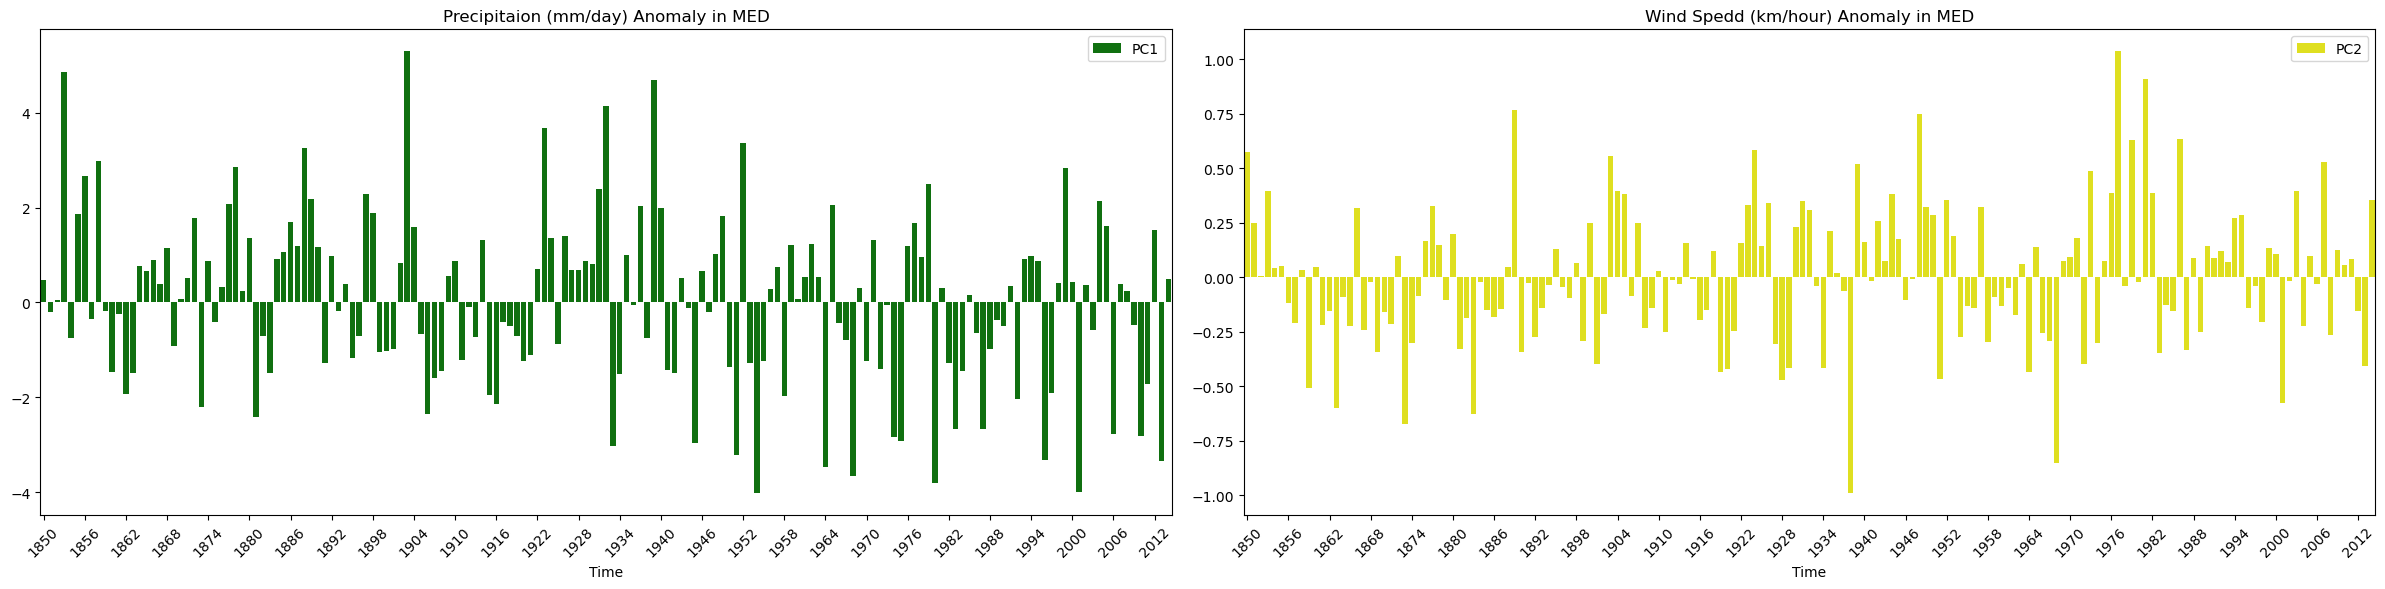

In [185]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

# Barplots
sns.barplot(x=eu_MED_pr_norm.time.values, y=eu_MED_pr_norm.values, label='PC1', color='green', ax=ax[0])
sns.barplot(x=eu_MED_sfcW_norm.time.values, y=eu_MED_sfcW_norm.values, label='PC2', color='yellow', ax=ax[1])

# Set x-axis labels and rotate ticks for readability
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].title.set_text('Precipitaion (mm/day) Anomaly in MED')
ax[1].title.set_text('Wind Spedd (km/hour) Anomaly in MED')
for a in ax:
    for label in a.get_xticklabels():
        label.set_rotation(45)
    a.set_xticks(ax[0].get_xticks()[::max(1, len(ax[0].get_xticks())//25)])  # Reduce number of ticks if too many

plt.tight_layout()
plt.show()

In [ ]:
# Calculating Standard Deviations
neu_std_pr=eu_NEU_pr_norm.std()
wce_std_pr=eu_WCE_pr_norm.std()
med_std_pr=eu_MED_pr_norm.std()
nca_std_pr=usa_NCA_pr_norm.std()
ena_std_pr=usa_ENA_pr_norm.std()
wna_std_pr=usa_WNA_pr_norm.std()
cna_std_pr=usa_CNA_pr_norm.std()

neu_std_sfcW=eu_NEU_sfcW_norm.std()
wce_std_sfcW=eu_WCE_sfcW_norm.std()
med_std_sfcW=eu_MED_sfcW_norm.std()
nca_std_sfcW=usa_NCA_sfcW_norm.std()
ena_std_sfcW=usa_ENA_sfcW_norm.std()
wna_std_sfcW=usa_WNA_sfcW_norm.std()
cna_std_sfcW=usa_CNA_sfcW_norm.std()

neu_std_ua=eu_NEU_ua_norm.std()
wce_std_ua=eu_WCE_ua_norm.std()
med_std_ua=eu_MED_ua_norm.std()
nca_std_ua=usa_NCA_ua_norm.std()
ena_std_ua=usa_ENA_ua_norm.std()
wna_std_ua=usa_WNA_ua_norm.std()
cna_std_ua=usa_CNA_ua_norm.std()

neu_std_va=eu_NEU_va_norm.std()
wce_std_va=eu_WCE_va_norm.std()
med_std_va=eu_MED_va_norm.std()
nca_std_va=usa_NCA_va_norm.std()    
ena_std_va=usa_ENA_va_norm.std()
wna_std_va=usa_WNA_va_norm.std()
cna_std_va=usa_CNA_va_norm.std()

In [ ]:
#For Taylor diagram

import sys
sys.path.append('/Volumes/YagizHDD/Meteorological-Applications/Data_Analysis_ML/Project_2')
from taylor_oss2 import srl2


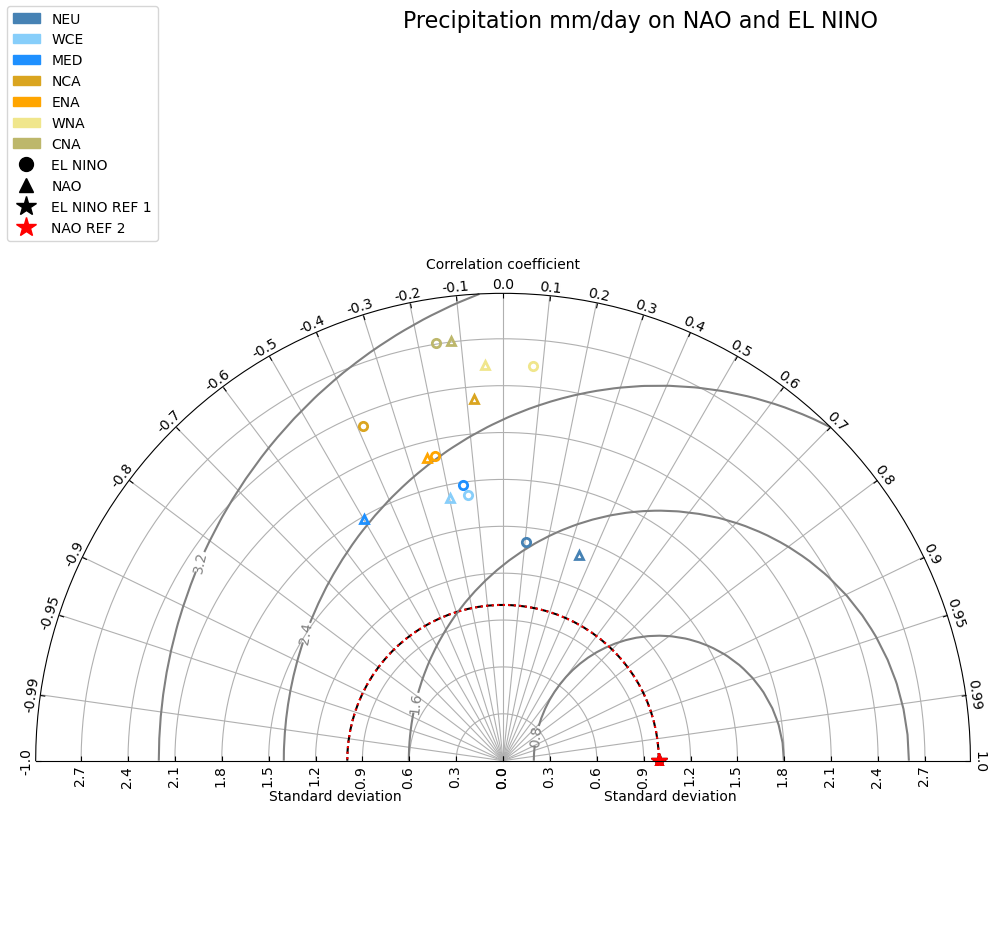

In [84]:
obsSTD = pc_EL_NINO.std(dim='time').values 
obsSTD2 = pc_NAO.std(dim='time').values  


# Values
l = ["EL NINO","NAO"]
r_pr= [pearson_corr_dict_en["NEU"],pearson_corr_dict_en["WCE"], pearson_corr_dict_en["MED"],pearson_corr_dict_en["NCA"],pearson_corr_dict_en["ENA"],pearson_corr_dict_en["WNA"],pearson_corr_dict_en["CNA"]],[pearson_corr_dict["NEU"],pearson_corr_dict["WCE"],pearson_corr_dict["MED"],pearson_corr_dict["NCA"],pearson_corr_dict["ENA"],pearson_corr_dict["WNA"],pearson_corr_dict["CNA"]] # first bracelet defines region and first value of each bracelet comes from model1 and then model2 ...
r_sfcW=[pearson_corr_dict_sfcW_en["NEU"],pearson_corr_dict_sfcW_en["WCE"], pearson_corr_dict_sfcW_en["MED"],pearson_corr_dict_sfcW_en["NCA"],pearson_corr_dict_sfcW_en["ENA"],pearson_corr_dict_sfcW_en["WNA"],pearson_corr_dict_sfcW_en["CNA"]],[pearson_corr_dict_sfcW["NEU"],pearson_corr_dict_sfcW["WCE"],pearson_corr_dict_sfcW["MED"],pearson_corr_dict_sfcW["NCA"],pearson_corr_dict_sfcW["ENA"],pearson_corr_dict_sfcW["WNA"],pearson_corr_dict_sfcW["CNA"]] # first bracelet defines region and first value of each bracelet comes from model1 and then model2 ...
r_ua=[pearson_corr_dict_ua_en["NEU"],pearson_corr_dict_ua_en["WCE"], pearson_corr_dict_ua_en["MED"],pearson_corr_dict_ua_en["NCA"],pearson_corr_dict_ua_en["ENA"],pearson_corr_dict_ua_en["WNA"],pearson_corr_dict_ua_en["CNA"]],[pearson_corr_dict_ua["NEU"],pearson_corr_dict_ua["WCE"],pearson_corr_dict_ua["MED"],pearson_corr_dict_ua["NCA"],pearson_corr_dict_ua["ENA"],pearson_corr_dict_ua["WNA"],pearson_corr_dict_ua["CNA"]] # first bracelet defines region and first value of each bracelet comes from model1 and then model2 ...
r_va=[pearson_corr_dict_va_en["NEU"],pearson_corr_dict_va_en["WCE"], pearson_corr_dict_va_en["MED"],pearson_corr_dict_va_en["NCA"],pearson_corr_dict_va_en["ENA"],pearson_corr_dict_va_en["WNA"],pearson_corr_dict_va_en["CNA"]],[pearson_corr_dict_va["NEU"],pearson_corr_dict_va["WCE"],pearson_corr_dict_va["MED"],pearson_corr_dict_va["NCA"],pearson_corr_dict_va["ENA"],pearson_corr_dict_va["WNA"],pearson_corr_dict_va["CNA"]] # first bracelet defines region and first value of each bracelet comes from model1 and then model2 ...
s_pr= [neu_std_pr,wce_std_pr,med_std_pr,nca_std_pr,ena_std_pr,wna_std_pr,cna_std_pr],[neu_std_pr,wce_std_pr,med_std_pr,nca_std_pr,ena_std_pr,wna_std_pr,cna_std_pr]# first bracelet defines region and first value of each bracelet comes from model1 and then model2 ...
s_sfcW=[neu_std_sfcW,wce_std_sfcW,med_std_sfcW,nca_std_sfcW,ena_std_sfcW,wna_std_sfcW,cna_std_sfcW],[neu_std_sfcW,wce_std_sfcW,med_std_sfcW,nca_std_sfcW,ena_std_sfcW,wna_std_sfcW,cna_std_sfcW] # first bracelet defines region and first value of each bracelet comes from model1 and then model2 ...
s_ua=[neu_std_ua/3.6,wce_std_ua/3.6,med_std_ua/3.6,nca_std_ua/3.6,ena_std_ua/3.6,wna_std_ua/3.6,cna_std_ua/3.6],[neu_std_ua/3.6,wce_std_ua/3.6,med_std_ua/3.6,nca_std_ua/3.6,ena_std_ua/3.6,wna_std_ua/3.6,cna_std_ua/3.6] # first bracelet defines region and first value of each bracelet comes from model1 and then model2 ...
s_va=[neu_std_va/3.6,wce_std_va/3.6,med_std_va/3.6,nca_std_va/3.6,ena_std_va/3.6,wna_std_va/3.6,cna_std_va/3.6],[neu_std_va/3.6,wce_std_va/3.6,med_std_va/3.6,nca_std_va/3.6,ena_std_va/3.6,wna_std_va/3.6,cna_std_va/3.6] # first bracelet defines region and first value of each bracelet comes from model1 and then model2 ...

srl2(obsSTD[0],obsSTD2[0], s_pr,r_pr,l,"Precipitation mm/day on NAO and EL NINO")

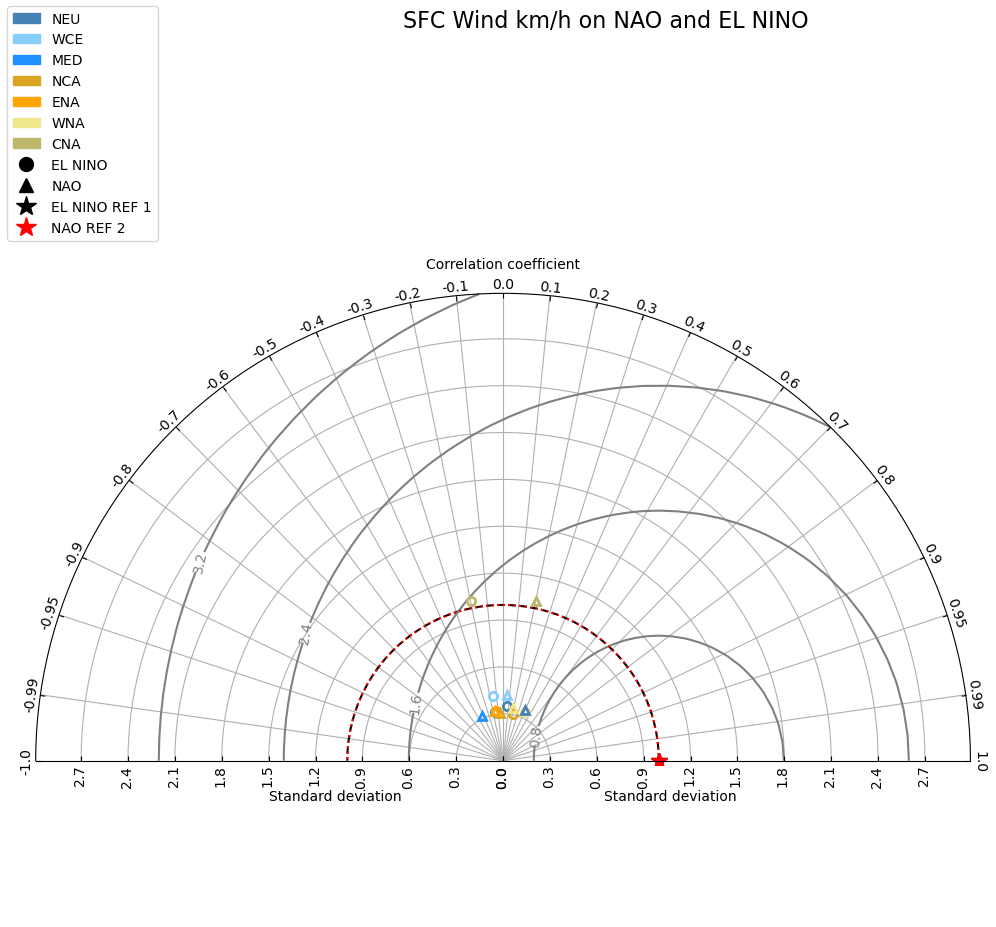

In [80]:
srl2(obsSTD[0],obsSTD2[0], s_sfcW,r_sfcW,l,"SFC Wind km/h on NAO and EL NINO")

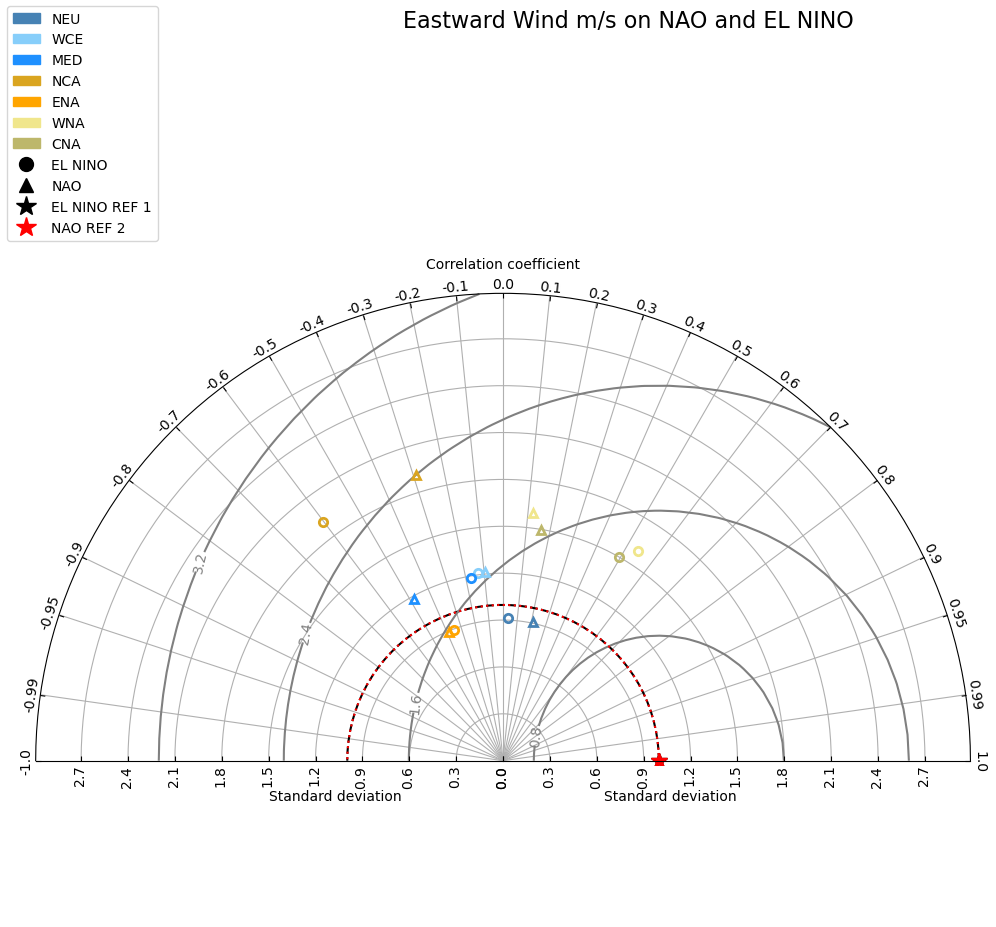

In [94]:
srl2(obsSTD[0],obsSTD2[0], s_ua,r_ua,l,"Eastward Wind m/s on NAO and EL NINO")

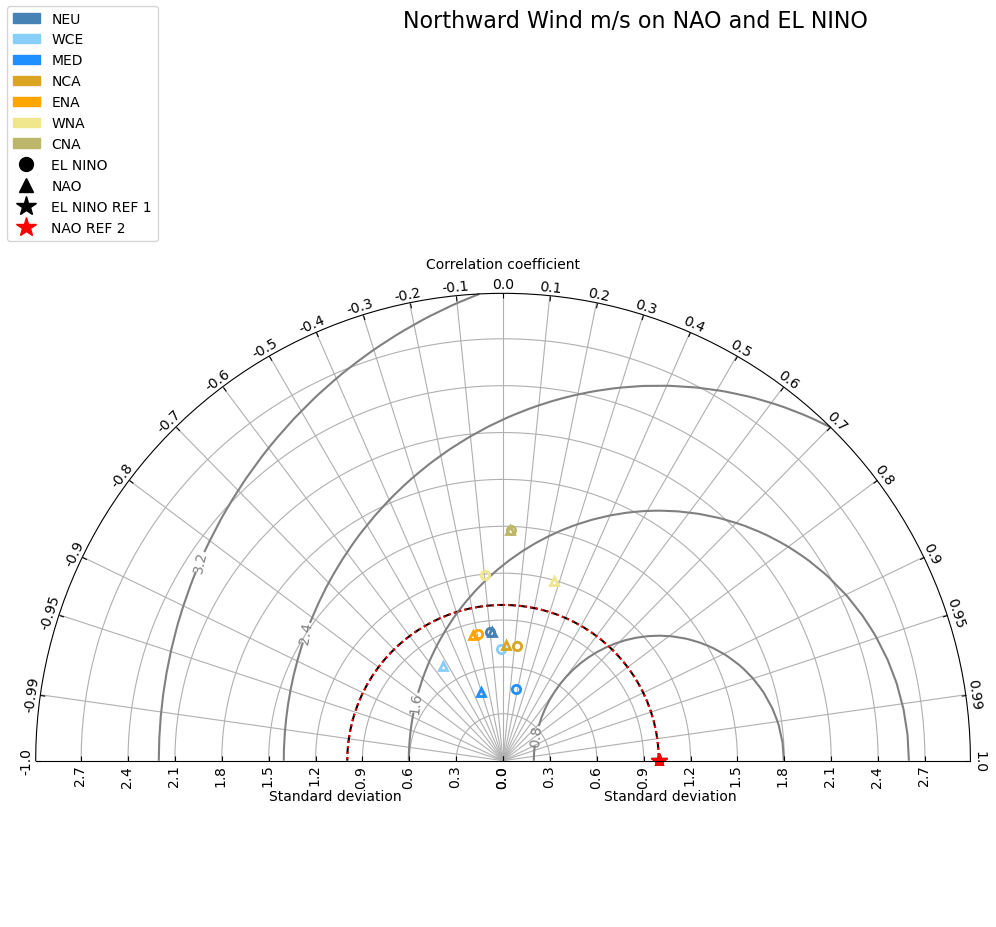

In [88]:
srl2(obsSTD[0],obsSTD2[0], s_va,r_va,l,"Northward Wind m/s on NAO and EL NINO")